# 1.Fetch data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A = pd.read_csv("C:/users/Paresh/My documents/Cars93.csv")

In [3]:
A.head()

,Id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Delete unnecssary columns

In [4]:
A.drop(labels=["Id","Make","Model"],axis=1,inplace=True)

In [5]:
A.head(2)

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA


# Missing Data Treatment

In [6]:
A.isna().sum()

Manufacturer           0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

In [7]:
from miss import replacer
replacer(A)

In [8]:
A.isna().sum()

Manufacturer          0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64

# Divide data into categorical and continuous

In [9]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Type                93 non-null     object 
 2   Min.Price           93 non-null     float64
 3   Price               93 non-null     float64
 4   Max.Price           93 non-null     float64
 5   MPG.city            93 non-null     int64  
 6   MPG.highway         93 non-null     int64  
 7   AirBags             93 non-null     object 
 8   DriveTrain          93 non-null     object 
 9   Cylinders           93 non-null     object 
 10  EngineSize          93 non-null     float64
 11  Horsepower          93 non-null     int64  
 12  RPM                 93 non-null     int64  
 13  Rev.per.mile        93 non-null     int64  
 14  Man.trans.avail     93 non-null     object 
 15  Fuel.tank.capacity  93 non-null     float64
 16  Passengers

In [10]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [11]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [12]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

# EDA CHARTS:

# 1. Univariate Analysis

# Univariate Analysis of continous columns

# Histogram

In [14]:
pd.set_option("display.Max_rows",None)
pd.set_option("display.MAx_columns",None)

In [15]:
A.sort_values(by=["Horsepower"])[["Horsepower"]]

,Horsepower
38,55
30,63
82,70
79,73
72,74
43,81
87,81
52,82
83,82
78,85


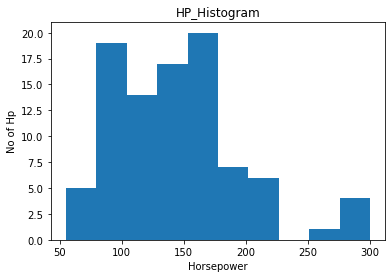

In [16]:
plt.hist(A.Horsepower)
plt.title("HP_Histogram")
plt.xlabel("Horsepower")
plt.ylabel("No of Hp")
plt.show()

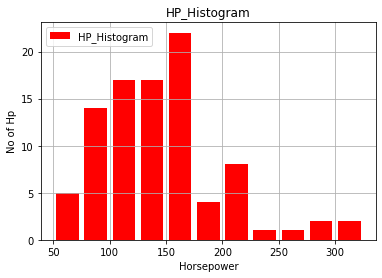

In [24]:
bins = [50,75,100,125,150,175,200,225,250,275,300,325]
plt.hist(A.Horsepower,bins,rwidth=0.8,color="red",label=["HP_Histogram"])
plt.title("HP_Histogram")
plt.xlabel("Horsepower")
plt.ylabel("No of Hp")
plt.legend(loc=2)
plt.grid(True)
plt.show()

# distribution plot

([<matplotlib.axis.XTick at 0xd6c0700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

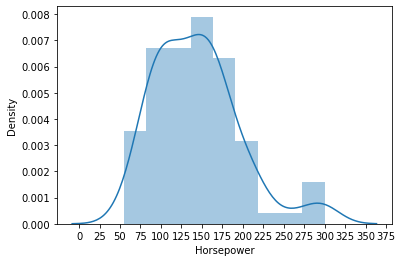

In [26]:
sb.distplot(A.Horsepower)
plt.xticks(range(0,380,25))

# Univariate of categorical columns

# Bar plot

In [27]:
A.Type.value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

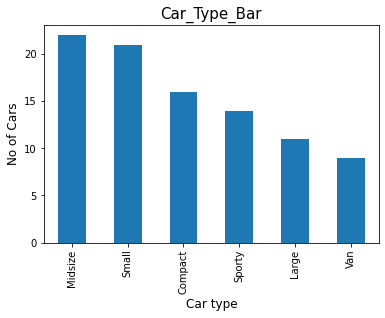

In [31]:
A.Type.value_counts().plot(kind="bar")
plt.title("Car_Type_Bar",fontsize=15)
plt.xlabel("Car type",fontsize=12)
plt.ylabel("No of Cars",fontsize=12)
plt.show()

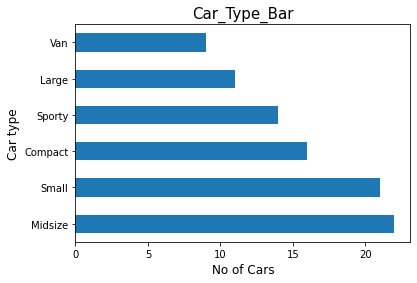

In [32]:
A.Type.value_counts().plot(kind="barh")
plt.title("Car_Type_Bar",fontsize=15)
plt.ylabel("Car type",fontsize=12)
plt.xlabel("No of Cars",fontsize=12)
plt.show()

# Pie plot

<AxesSubplot:ylabel='Type'>

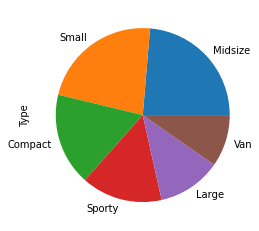

In [33]:
A.Type.value_counts().plot(kind="pie")

# countplot

<AxesSubplot:xlabel='Type', ylabel='count'>

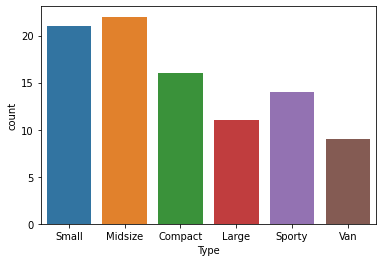

In [34]:
sb.countplot(A.Type)

<AxesSubplot:xlabel='Type', ylabel='count'>

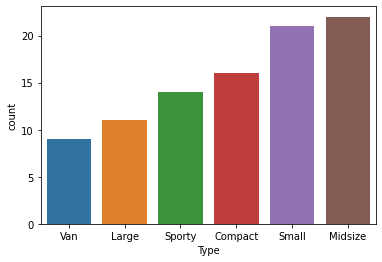

In [35]:
sb.countplot(A.Type,order=["Van","Large","Sporty","Compact","Small","Midsize"])


# Multiple plots in one area

In [36]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [37]:
len(cat)

7

<AxesSubplot:xlabel='Origin', ylabel='count'>

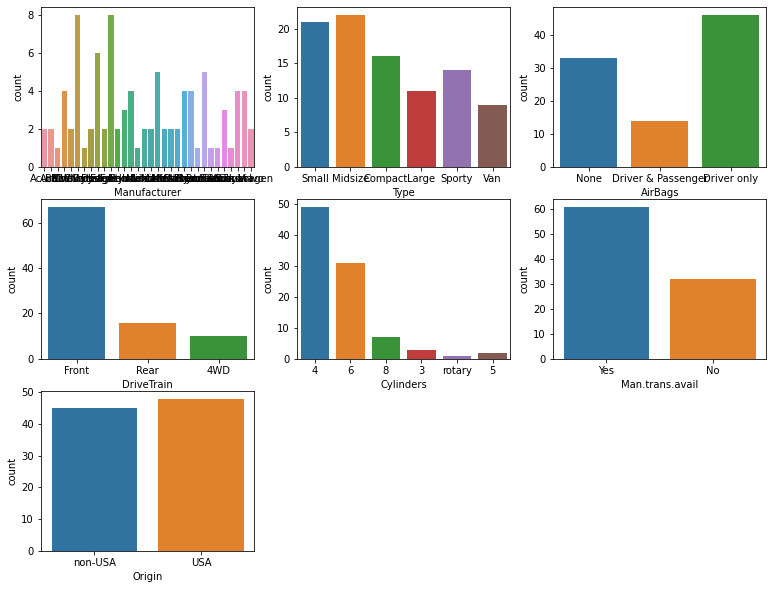

In [38]:
plt.figure(figsize=(13,10))

plt.subplot(3,3,1)
sb.countplot(A.Manufacturer)

plt.subplot(3,3,2)
sb.countplot(A.Type)

plt.subplot(3,3,3)
sb.countplot(A.AirBags)

plt.subplot(3,3,4)
sb.countplot(A.DriveTrain)

plt.subplot(3,3,5)
sb.countplot(A.Cylinders)

plt.subplot(3,3,6)
sb.countplot(A["Man.trans.avail"])

plt.subplot(3,3,7)
sb.countplot(A.Origin)




# Bivariate Analysis

# 1. (X-cat,Y-con)

# Box plot

<AxesSubplot:xlabel='Type', ylabel='Width'>

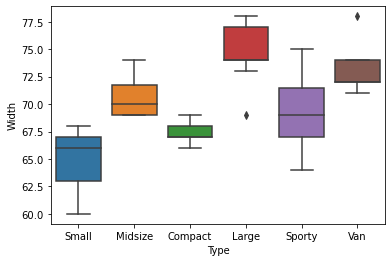

In [39]:
sb.boxplot(A.Type,A.Width)

In [40]:
A.Type.unique()

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [41]:
for i in A.Type.unique():
    print("Results of category",i)
    print(A[A.Type==i][["Width"]].describe()[3:9])
    print("-------------------------------\n\n")

Results of category Small
     Width
min   60.0
25%   63.0
50%   66.0
75%   67.0
max   68.0
-------------------------------


Results of category Midsize
     Width
min  69.00
25%  69.00
50%  70.00
75%  71.75
max  74.00
-------------------------------


Results of category Compact
     Width
min   66.0
25%   67.0
50%   67.0
75%   68.0
max   69.0
-------------------------------


Results of category Large
     Width
min   69.0
25%   74.0
50%   74.0
75%   77.0
max   78.0
-------------------------------


Results of category Sporty
     Width
min   64.0
25%   67.0
50%   69.0
75%   71.5
max   75.0
-------------------------------


Results of category Van
     Width
min   71.0
25%   72.0
50%   72.0
75%   74.0
max   78.0
-------------------------------




# 2. (X-cat,Y-cat)

# Countplot with hue

In [43]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

<AxesSubplot:xlabel='Type', ylabel='count'>

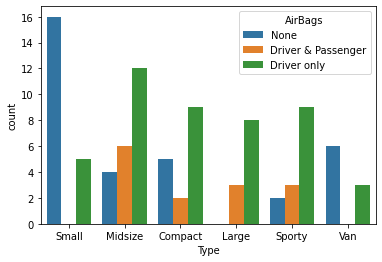

In [45]:
sb.countplot(A.Type,hue=A["AirBags"])

# 2. (X-con,Y-con)

# Scatter plot

In [46]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

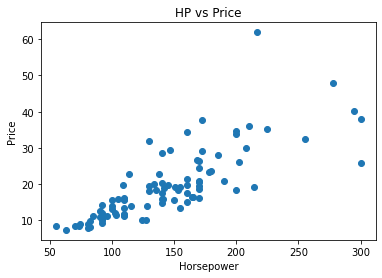

In [49]:
plt.scatter(A.Horsepower,A.Price)
plt.title("HP vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()